# Churn Prediction using Regression and Random Forest

#### Result: Achieved an accuracy of 86% with Random Forest Algorithm and 81% with Linear Regression

## Import Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

churn = pd.read_csv("data/churn.csv")

churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Information

#### Columns
- **RowNumber**—corresponds to the record (row) number and has no effect on the output.
- **CustomerId**—contains random values and has no effect on customer leaving the bank.
- **Surname**—the surname of a customer has no impact on their decision to leave the bank.
- **CreditScore**—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- **Geography**—a customer’s location can affect their decision to leave the bank.
- **Gender**—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- **Age**—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- **Tenure**—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- **Balance**—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- **NumOfProducts**—refers to the number of products that a customer has purchased through the bank.
- **HasCrCard**—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- **IsActiveMember**—active customers are less likely to leave the bank.
- **EstimatedSalary**—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- **Exited**—whether or not the customer left the bank.

In [2]:
churn.describe

<bound method NDFrame.describe of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumO

In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
churn = churn.drop_duplicates()
churn = churn.drop(columns=['Surname', 'RowNumber'])

#### Explore the categorical attributes 

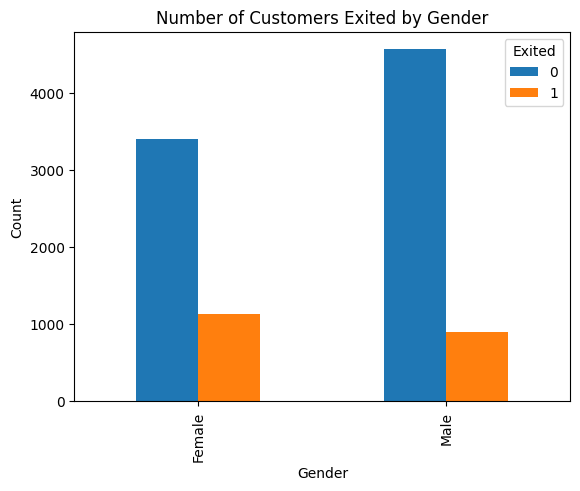

In [5]:
# Group the data by gender and exited status
grouped_data = churn.groupby(['Gender', 'Exited']).size()

# Create the bar chart
grouped_data.unstack().plot(kind='bar')
plt.title('Number of Customers Exited by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

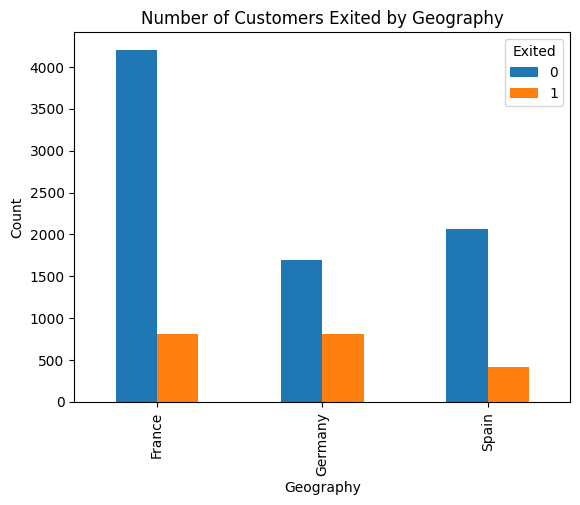

In [6]:
# Group the data by gender and exited status
grouped_data = churn.groupby(['Geography', 'Exited']).size()

# Create the bar chart
grouped_data.unstack().plot(kind='bar')
plt.title('Number of Customers Exited by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

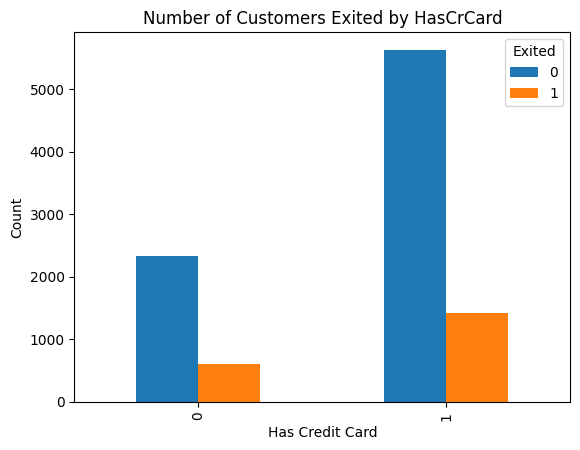

In [7]:
# Group the data by gender and exited status
grouped_data = churn.groupby(['HasCrCard', 'Exited']).size()

# Create the bar chart
grouped_data.unstack().plot(kind='bar')
plt.title('Number of Customers Exited by HasCrCard')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.show()

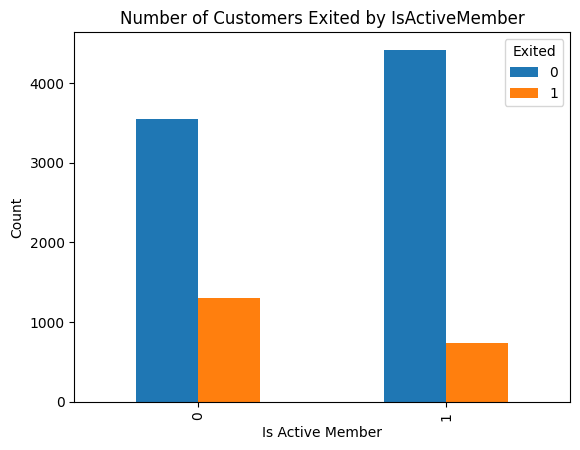

In [8]:
# Group the data by gender and exited status
grouped_data = churn.groupby(['IsActiveMember', 'Exited']).size()

# Create the bar chart
grouped_data.unstack().plot(kind='bar')
plt.title('Number of Customers Exited by IsActiveMember')
plt.xlabel('Is Active Member')
plt.ylabel('Count')
plt.show()

#### Numerical Attributes and Correlations

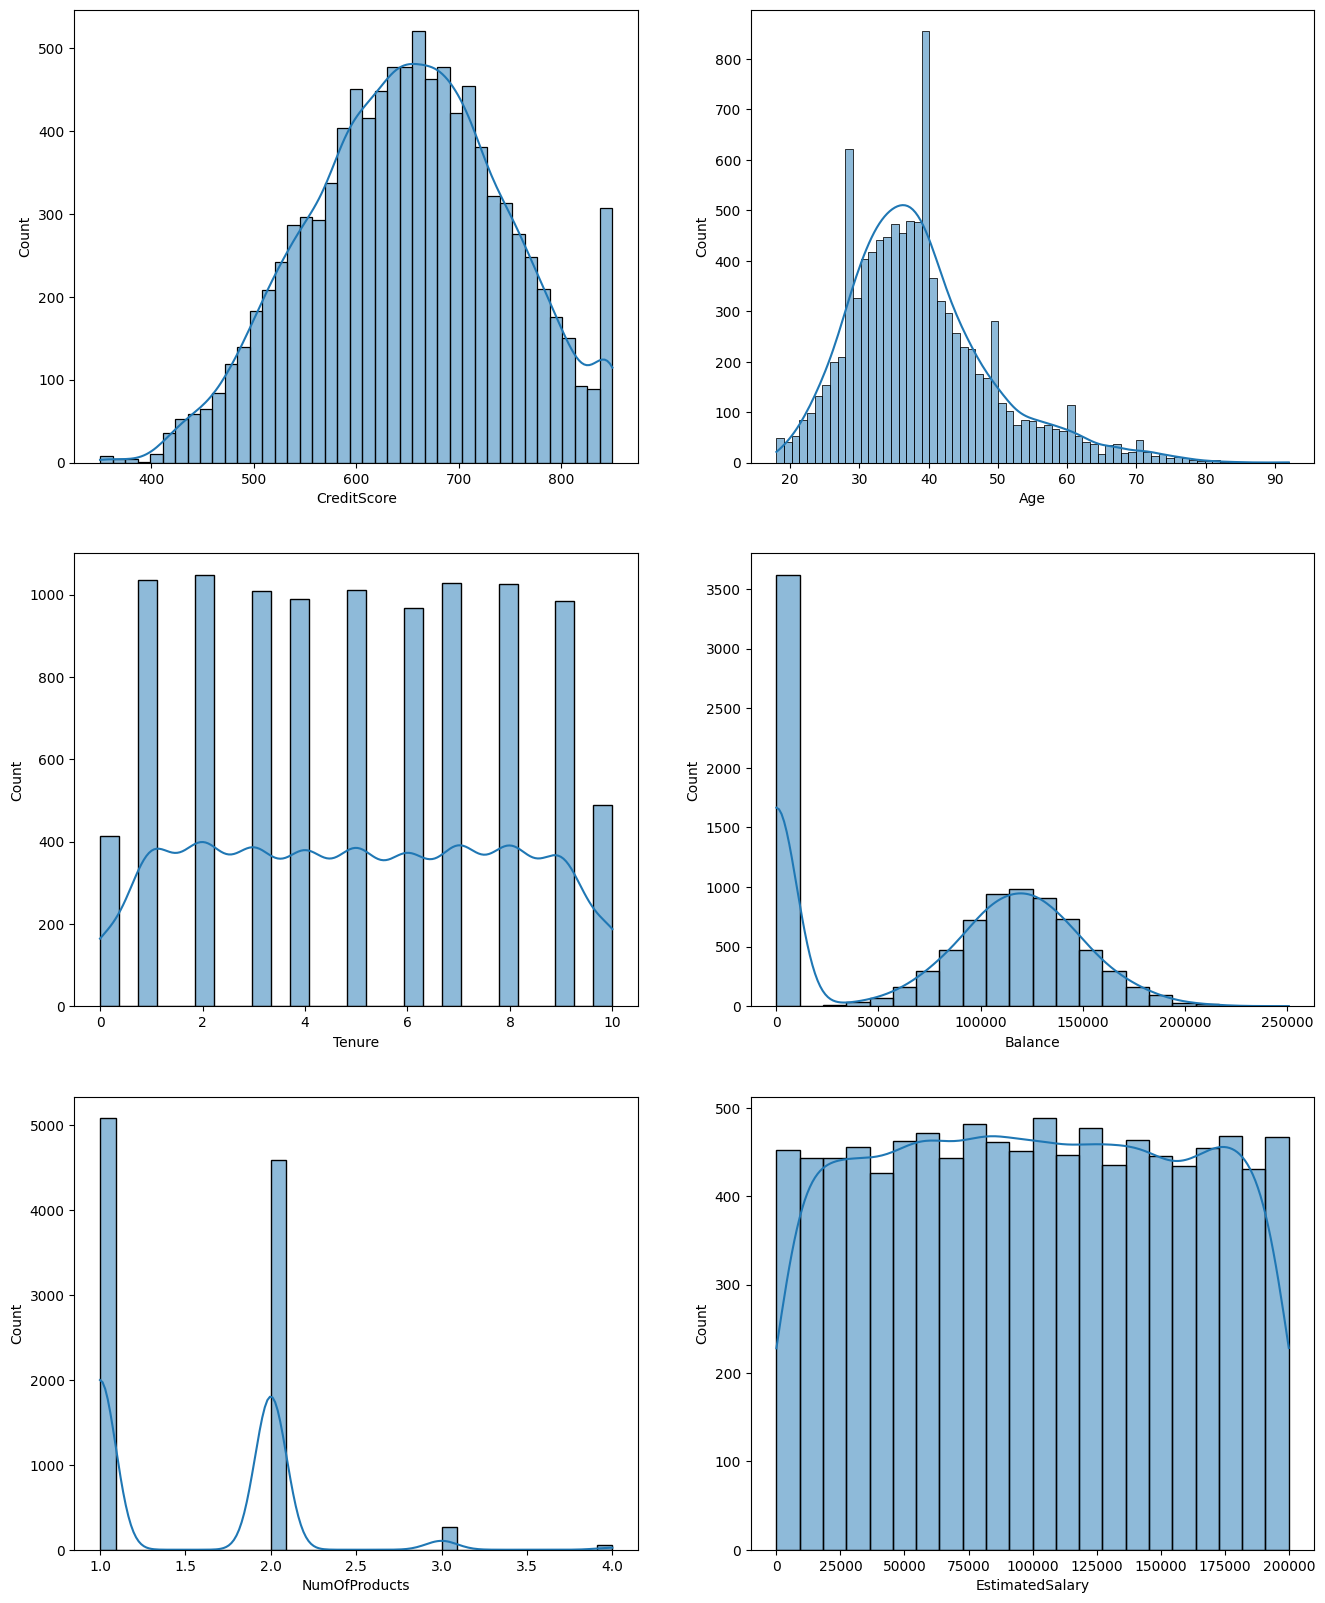

In [9]:
# Define the columns to analyze
columns_to_analyze = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (16, 20))
for i, column in enumerate(columns_to_analyze):
        row = i//2
        col = i%2
        ax = axes[row, col]
        sns.histplot(data= churn[column], ax = ax, kde= True)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [11]:
label_encoder = LabelEncoder()
churn['Gender'] = label_encoder.fit_transform(churn['Gender'])
#turn categorical attribute into dummy values
churn = pd.get_dummies(churn, columns=['Geography'], drop_first=True)

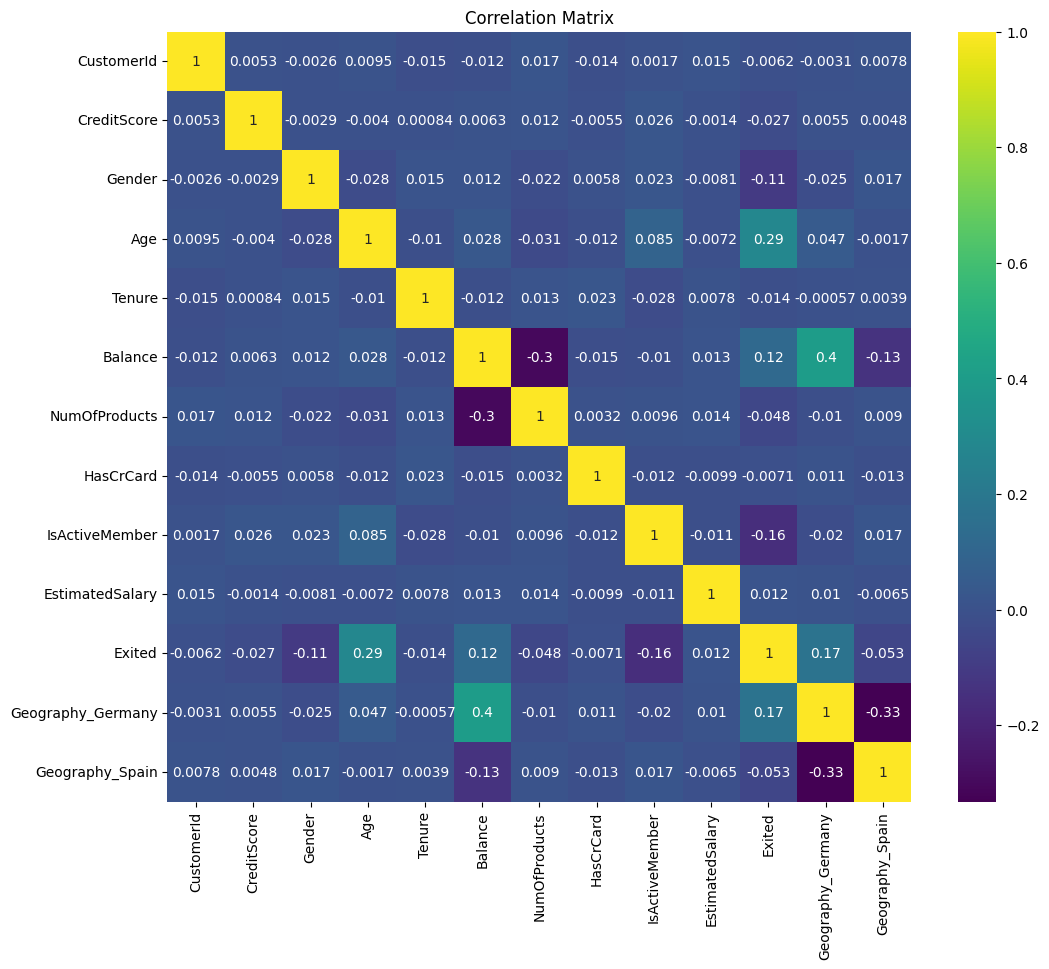

In [12]:
# Create the correlation matrix
correlation_matrix = churn.corr()
plt.figure(figsize=(12,10))
# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', )
plt.title('Correlation Matrix')
plt.show()

## Build Model

In [13]:
X = churn.drop(columns=['Exited'])
y = churn['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)

#### Feature Scaling

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### **Random Forest Algorithm**

In [15]:
model = RandomForestClassifier(n_estimators=300, random_state=123)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=123)

In [16]:
y_pred = model.predict(X_test)

In [17]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(conf_matrix)
print(class_report)
print(accuracy)

[[1528   58]
 [ 219  195]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1586
           1       0.77      0.47      0.58       414

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

0.8615


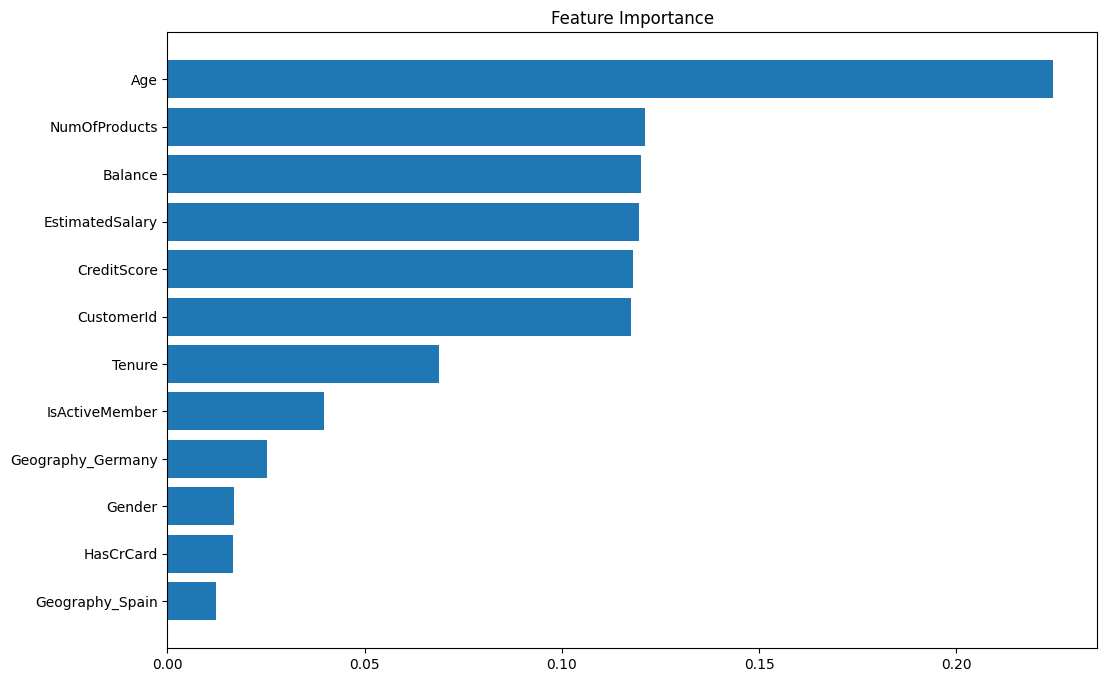

In [18]:
features = churn.drop(columns=['Exited'])
importance = model.feature_importances_
indices = np.argsort(importance)[::1]
columns = [features.columns.tolist()[i] for i in indices]

plt.figure(figsize=(12,8))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importance[indices])
plt.yticks(range(X.shape[1]), columns)
plt.show()

#### **Linear Regression**

In [19]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(random_state=123)
reg.fit(X_train, y_train)

y_pred_reg = reg.predict(X_test)

conf_matrix_reg = confusion_matrix(y_test, y_pred_reg)
class_report_reg = classification_report(y_test, y_pred_reg)
accuracy_reg = accuracy_score(y_test, y_pred_reg)

print(conf_matrix_reg)
print(class_report_reg)
print(accuracy_reg)

[[1528   58]
 [ 319   95]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1586
           1       0.62      0.23      0.34       414

    accuracy                           0.81      2000
   macro avg       0.72      0.60      0.61      2000
weighted avg       0.78      0.81      0.78      2000

0.8115
